In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import datetime
import seaborn as sns

from matplotlib.lines import Line2D
%matplotlib inline

In [52]:
fp = r"..\input_data\NYPD_Motor_Vehicle_Collisions.dta"
collisions_df = pd.read_stata(fp)

In [53]:
collisions_df.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  contributingfactorvehicle2  \
0                                            ...                 Unspecified   
1                                            ...                 Unspecified   
2  161-18    140 street                      ...                               
3                                            ...                 Unspecified   
4                                            ...                 Unspecified   

   contributingfactorvehicle3  contributingfactorvehicle4  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   contributingfactorvehicle5  uniquekey                     vehicletypecode1  \
0                              3987045.0  Station Wagon/Sport Utility Vehicle   
1                              3987187.0  Station Wagon/Sport Utility Vehicle   
2                              3986792.0                                Sedan   
3                              3986861.0                                Sedan   
4                              3986532.0                                Sedan   

   vehicletypecode2  vehicletypecode3 vehicletypecode4 vehicletypecode5  
0             Sedan                                                      
1             Sedan                                                      
2                                                                        
3             Sedan                                                      
4             Sedan                                                      

[5 rows x 29 columns]

In [54]:
collisions_df.dtypes

date                           object
time                           object
borough                        object
zipcode                        object
latitude                      float32
longitude                     float32
location                       object
onstreetname                   object
crossstreetname                object
offstreetname                  object
numberofpersonsinjured        float64
numberofpersonskilled         float64
numberofpedestriansinjured    float64
numberofpedestrianskilled     float64
numberofcyclistinjured        float64
numberofcyclistkilled         float64
numberofmotoristinjured       float64
numberofmotoristkilled        float64
contributingfactorvehicle1     object
contributingfactorvehicle2     object
contributingfactorvehicle3     object
contributingfactorvehicle4     object
contributingfactorvehicle5     object
uniquekey                     float64
vehicletypecode1               object
vehicletypecode2               object
vehicletypec

In [59]:
collisions_df['timelen'] = collisions_df['time'].str.len()

In [60]:
collisions_df['timelen'].value_counts()

5    1011882
4     339332
0          1
Name: timelen, dtype: int64

In [62]:
collisions_df.index[collisions_df['timelen'] == 0].tolist()

[695004]

In [63]:
collisions_df = collisions_df.drop(collisions_df.index[695004])

In [64]:
collisions_df['time_py'] = pd.to_datetime(collisions_df['time'], format= '%H:%M' ).dt.time

In [68]:
collisions_df[['time_py','time']].tail()

time_py  time
1351210  09:45:00  9:45
1351211  09:50:00  9:50
1351212  09:50:00  9:50
1351213  09:57:00  9:57
1351214  09:59:00  9:59

## Collapse the data into outcomes per day

In [5]:
collisions_df['count'] = 1

In [ ]:
latenight = 11:00:00 p.m. to 4.59 a.m.
nonlatenight = 

In [ ]:
collisions_df['count_nonlate'] = np.where(collisions_df['time_py']>=15.00, True, False)

In [6]:
collapsed_collisions_df = pd.DataFrame(collisions_df.groupby('date').agg({
    'count': sum, # sum number of collisions per day
    'numberofpersonsinjured': sum,
    'numberofpedestriansinjured': sum,
    'numberofcyclistinjured': sum,
    'numberofmotoristinjured': sum,
})).reset_index()

In [7]:
collapsed_collisions_df.head()

date  count  \
0   PARKING LOT).",0,0,0,0,0,0,0,0,Unspecified,Un...      1   
1                                         01/01/2013    381   
2                                         01/01/2014    399   
3                                         01/01/2015    395   
4                                         01/01/2016    394   

   numberofpersonsinjured  numberofpedestriansinjured  numberofcyclistinjured  \
0                     0.0                         0.0                     0.0   
1                   157.0                        34.0                     3.0   
2                   165.0                        24.0                     2.0   
3                   130.0                        16.0                     1.0   
4                   124.0                        13.0                     5.0   

   numberofmotoristinjured  
0                      0.0  
1                    120.0  
2                    139.0  
3                    113.0  
4                    107.0

In [8]:
collapsed_collisions_df = collapsed_collisions_df.drop(collapsed_collisions_df.index[0])

In [9]:
collapsed_collisions_df['datelen'] = collapsed_collisions_df['date'].str.len()

In [10]:
collapsed_collisions_df['datelen'].value_counts()

10    2277
Name: datelen, dtype: int64

In [11]:
collapsed_collisions_df.dtypes

date                           object
count                           int64
numberofpersonsinjured        float64
numberofpedestriansinjured    float64
numberofcyclistinjured        float64
numberofmotoristinjured       float64
datelen                         int64
dtype: object

## Format the date variable

In [12]:
collapsed_collisions_df['date_py'] = pd.to_datetime(collapsed_collisions_df['date'], format='%m/%d/%Y')

In [13]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  numberofpedestriansinjured  \
1  01/01/2013    381                   157.0                        34.0   
2  01/01/2014    399                   165.0                        24.0   
3  01/01/2015    395                   130.0                        16.0   
4  01/01/2016    394                   124.0                        13.0   
5  01/01/2017    483                   167.0                        25.0   

   numberofcyclistinjured  numberofmotoristinjured  datelen    date_py  
1                     3.0                    120.0       10 2013-01-01  
2                     2.0                    139.0       10 2014-01-01  
3                     1.0                    113.0       10 2015-01-01  
4                     5.0                    107.0       10 2016-01-01  
5                     6.0                    140.0       10 2017-01-01

Set date_py as the index

In [14]:
collapsed_collisions_df = collapsed_collisions_df.set_index('date_py')

In [15]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  \
date_py                                                 
2013-01-01  01/01/2013    381                   157.0   
2014-01-01  01/01/2014    399                   165.0   
2015-01-01  01/01/2015    395                   130.0   
2016-01-01  01/01/2016    394                   124.0   
2017-01-01  01/01/2017    483                   167.0   

            numberofpedestriansinjured  numberofcyclistinjured  \
date_py                                                          
2013-01-01                        34.0                     3.0   
2014-01-01                        24.0                     2.0   
2015-01-01                        16.0                     1.0   
2016-01-01                        13.0                     5.0   
2017-01-01                        25.0                     6.0   

            numberofmotoristinjured  datelen  
date_py                                       
2013-01-01                    120.0       10  
2014-01-01                    139.0       10  
2015-01-01                    113.0       10  
2016-01-01                    107.0       10  
2017-01-01                    140.0       10

In [16]:
collapsed_collisions_df['year'] = collapsed_collisions_df.index.year
collapsed_collisions_df['quarter'] = collapsed_collisions_df.index.quarter
collapsed_collisions_df['month'] = collapsed_collisions_df.index.month
collapsed_collisions_df['weekdayname'] = collapsed_collisions_df.index.weekday_name

In [17]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  \
date_py                                                 
2013-01-01  01/01/2013    381                   157.0   
2014-01-01  01/01/2014    399                   165.0   
2015-01-01  01/01/2015    395                   130.0   
2016-01-01  01/01/2016    394                   124.0   
2017-01-01  01/01/2017    483                   167.0   

            numberofpedestriansinjured  numberofcyclistinjured  \
date_py                                                          
2013-01-01                        34.0                     3.0   
2014-01-01                        24.0                     2.0   
2015-01-01                        16.0                     1.0   
2016-01-01                        13.0                     5.0   
2017-01-01                        25.0                     6.0   

            numberofmotoristinjured  datelen  year  quarter  month weekdayname  
date_py                                                                         
2013-01-01                    120.0       10  2013        1      1     Tuesday  
2014-01-01                    139.0       10  2014        1      1   Wednesday  
2015-01-01                    113.0       10  2015        1      1    Thursday  
2016-01-01                    107.0       10  2016        1      1      Friday  
2017-01-01                    140.0       10  2017        1      1      Sunday

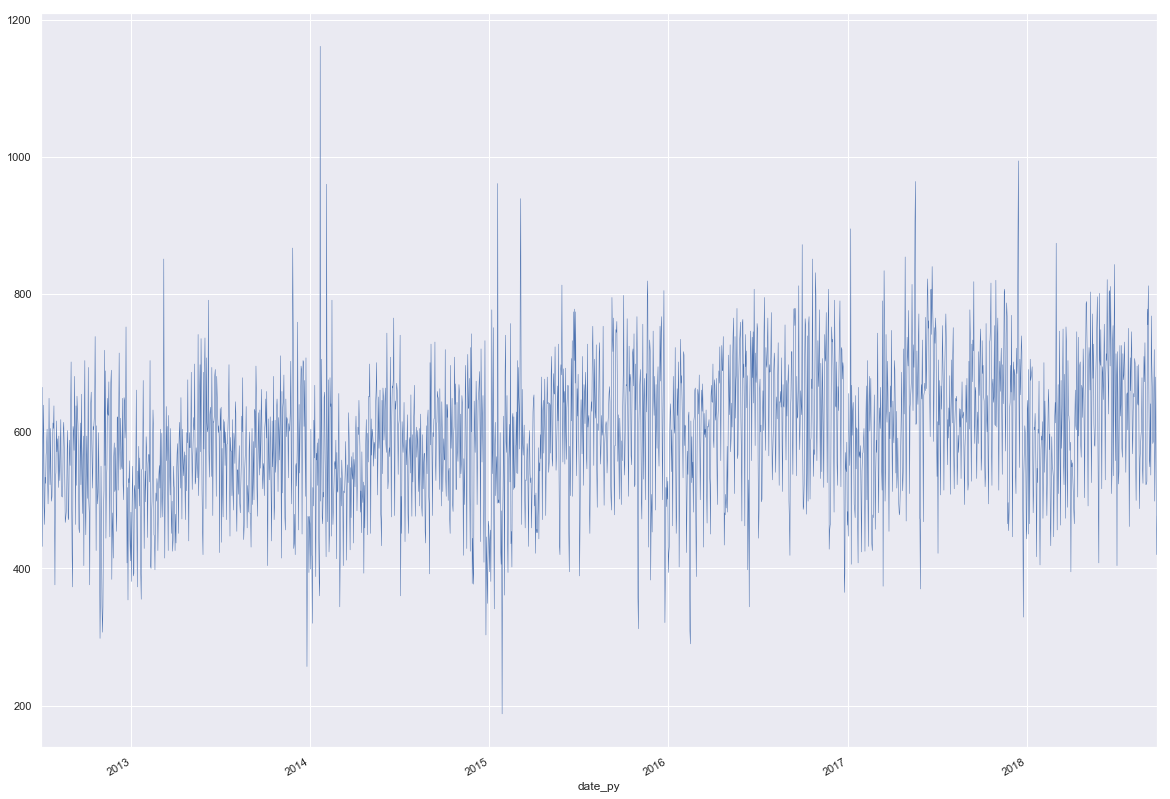

In [19]:
sns.set(rc={'figure.figsize':(20, 15)})
collapsed_collisions_df['count'].plot(linewidth=0.5);

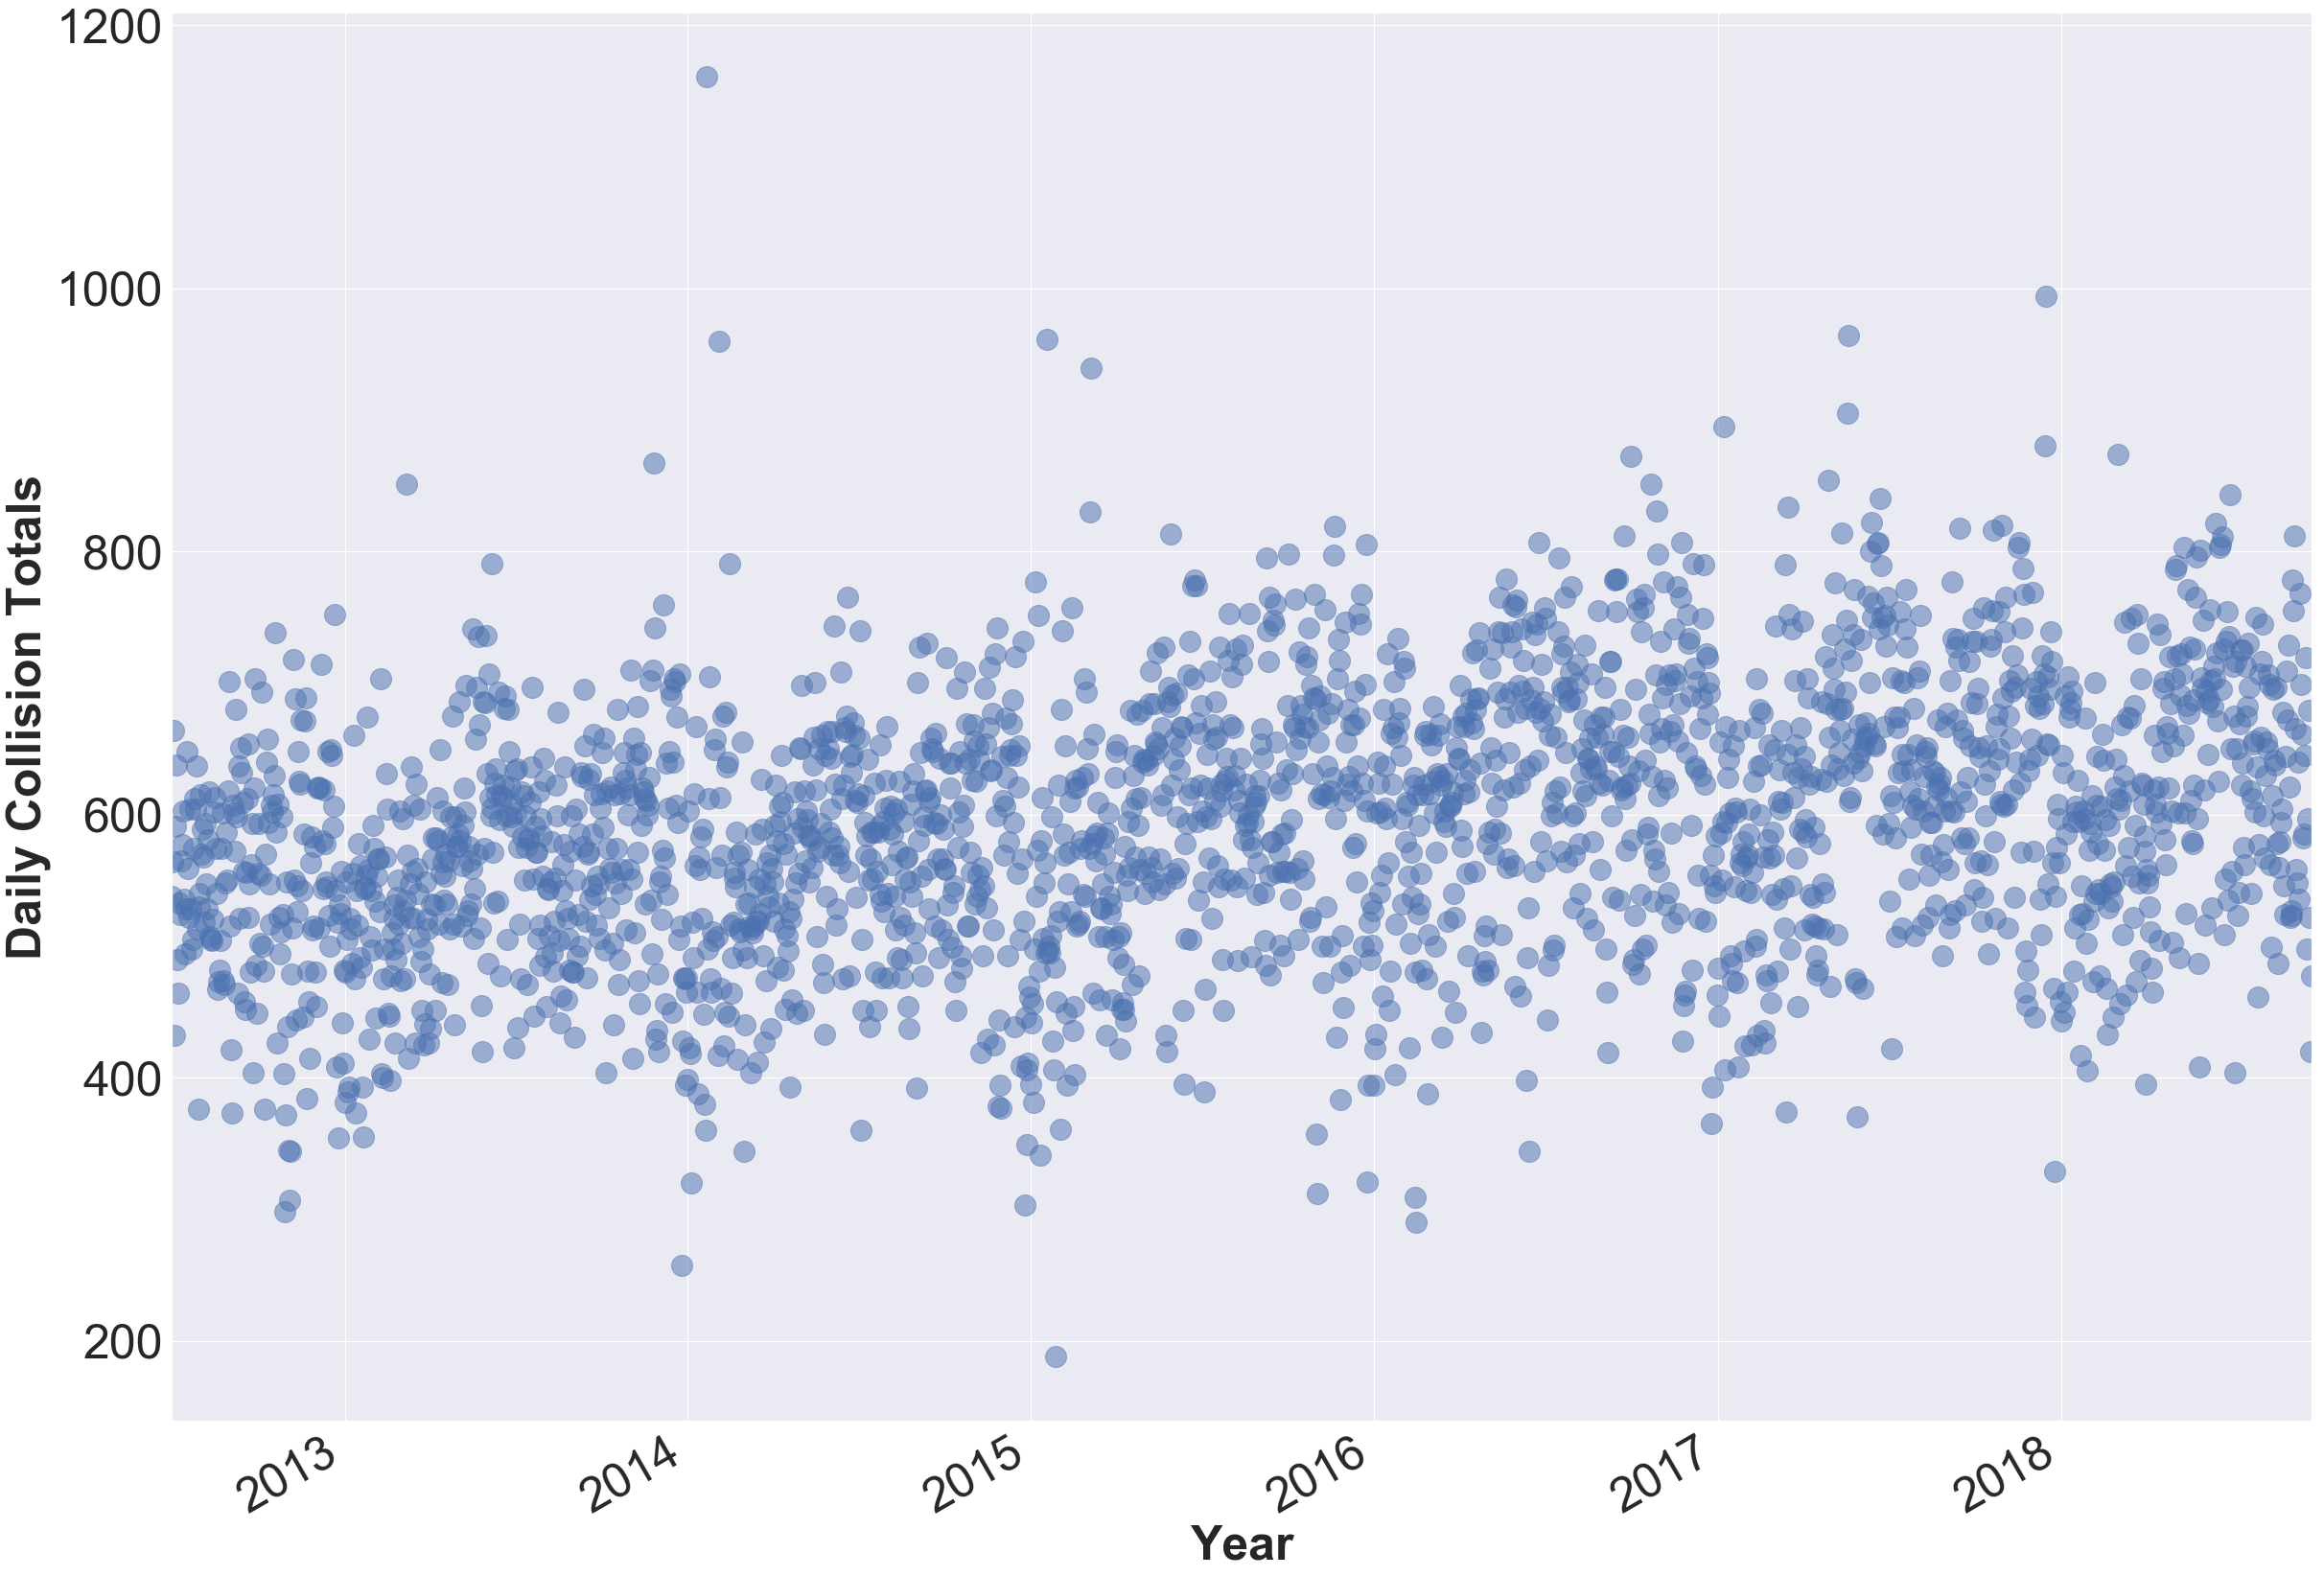

In [51]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['count'].plot(marker='o', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Collision Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
#plt.savefig('dailycollisions.png')
plt.savefig('../manuscripts/dailycollisions.png', bbox_inches='tight')


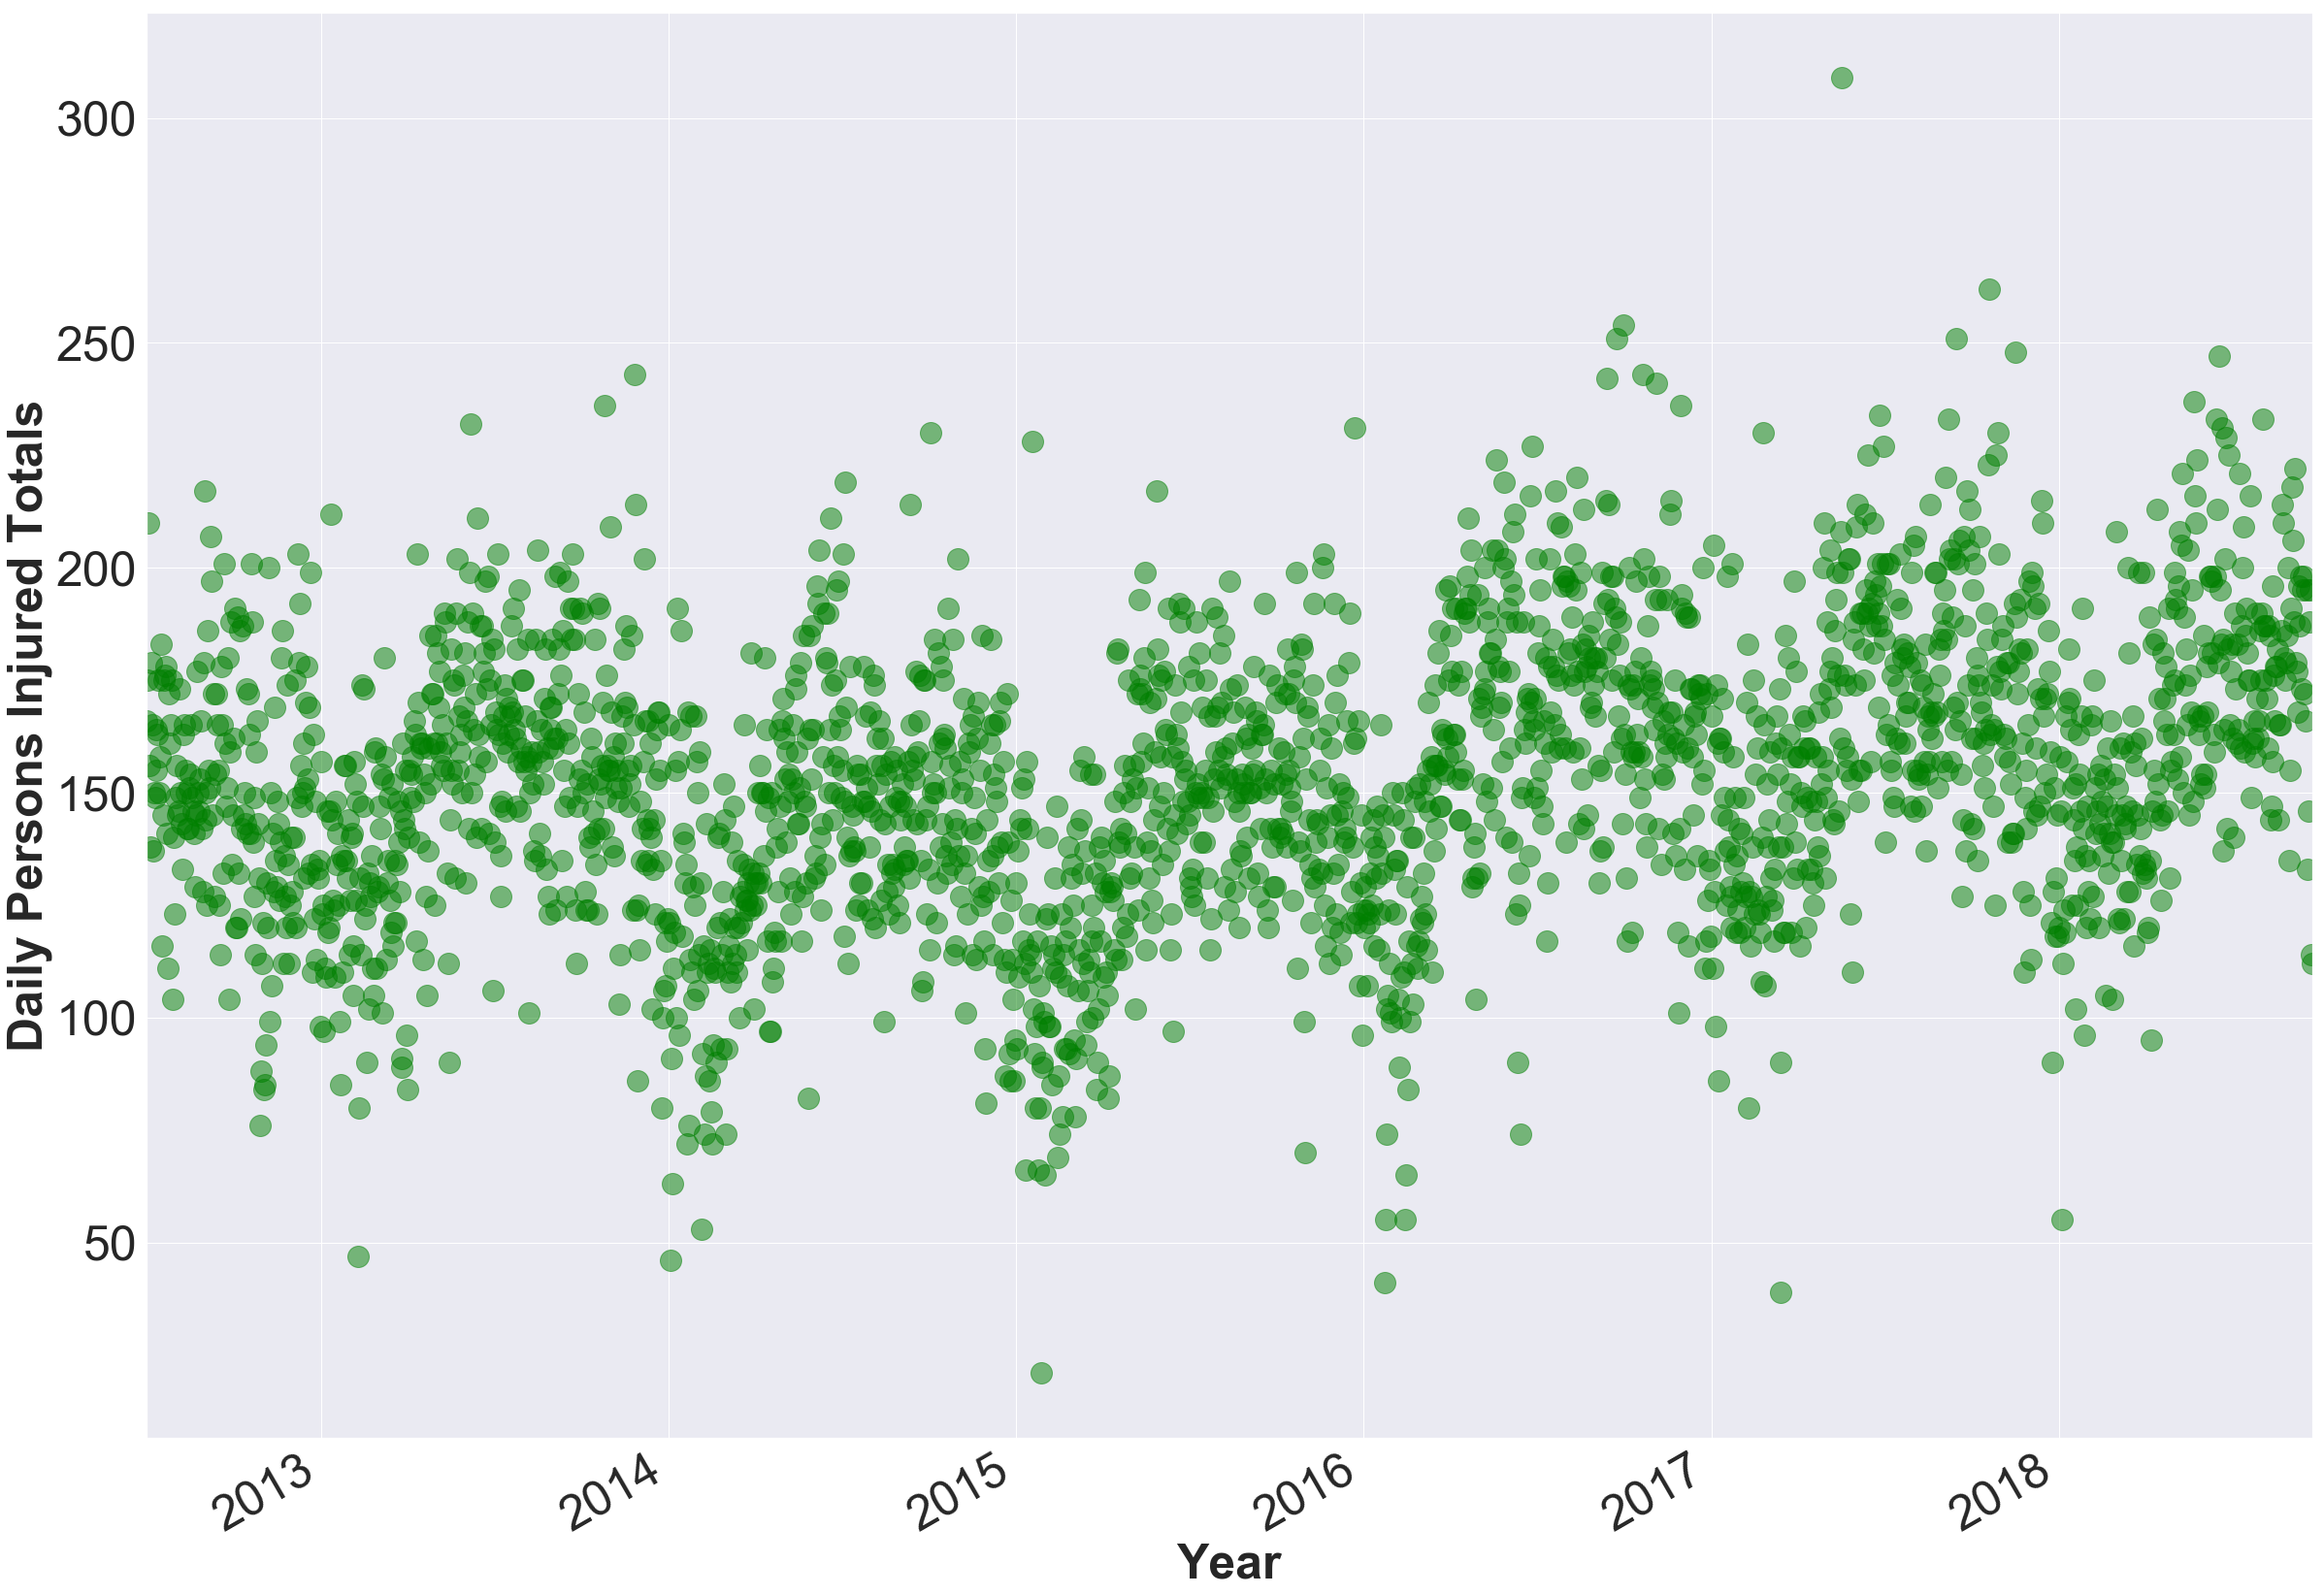

In [50]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofpersonsinjured'].plot(marker='o', color='green', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Persons Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')

plt.savefig('../manuscripts/dailypersonsinjuries.png', bbox_inches='tight')


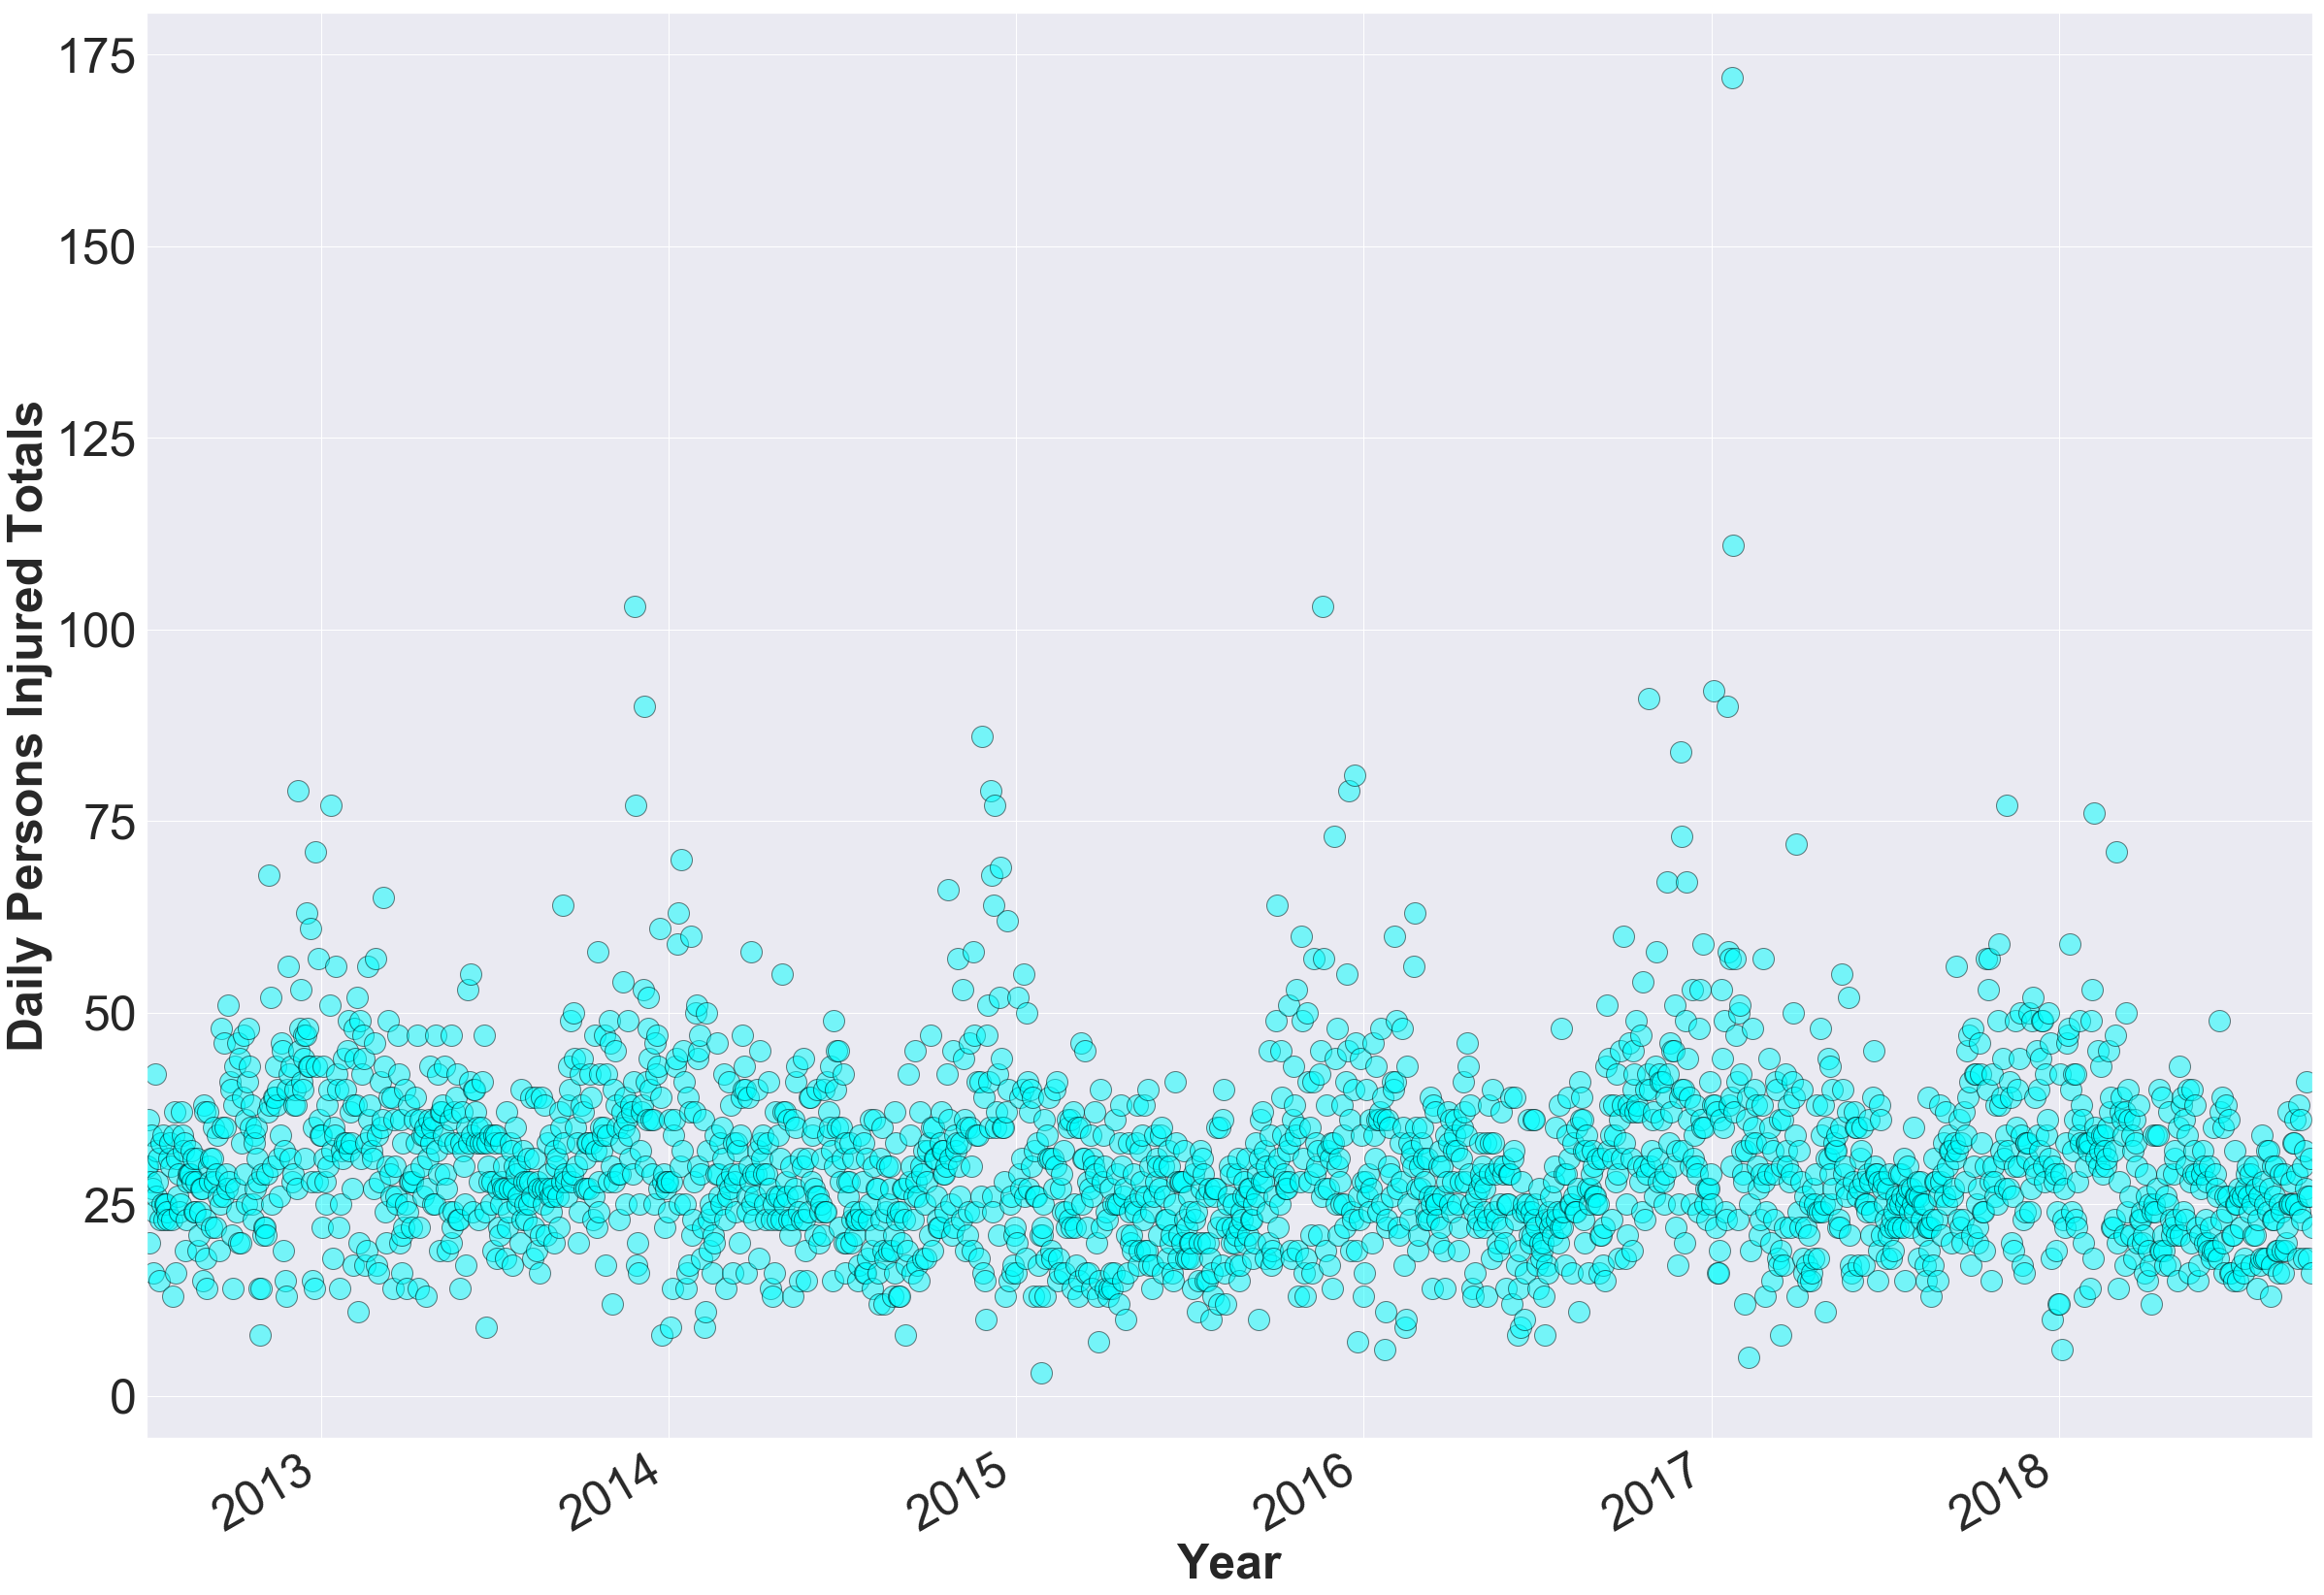

In [46]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofpedestriansinjured'].plot(marker='o', color='cyan',markeredgecolor = 'black', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Persons Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')

plt.savefig('../manuscripts/dailypedestriansinjuries.png', bbox_inches='tight')

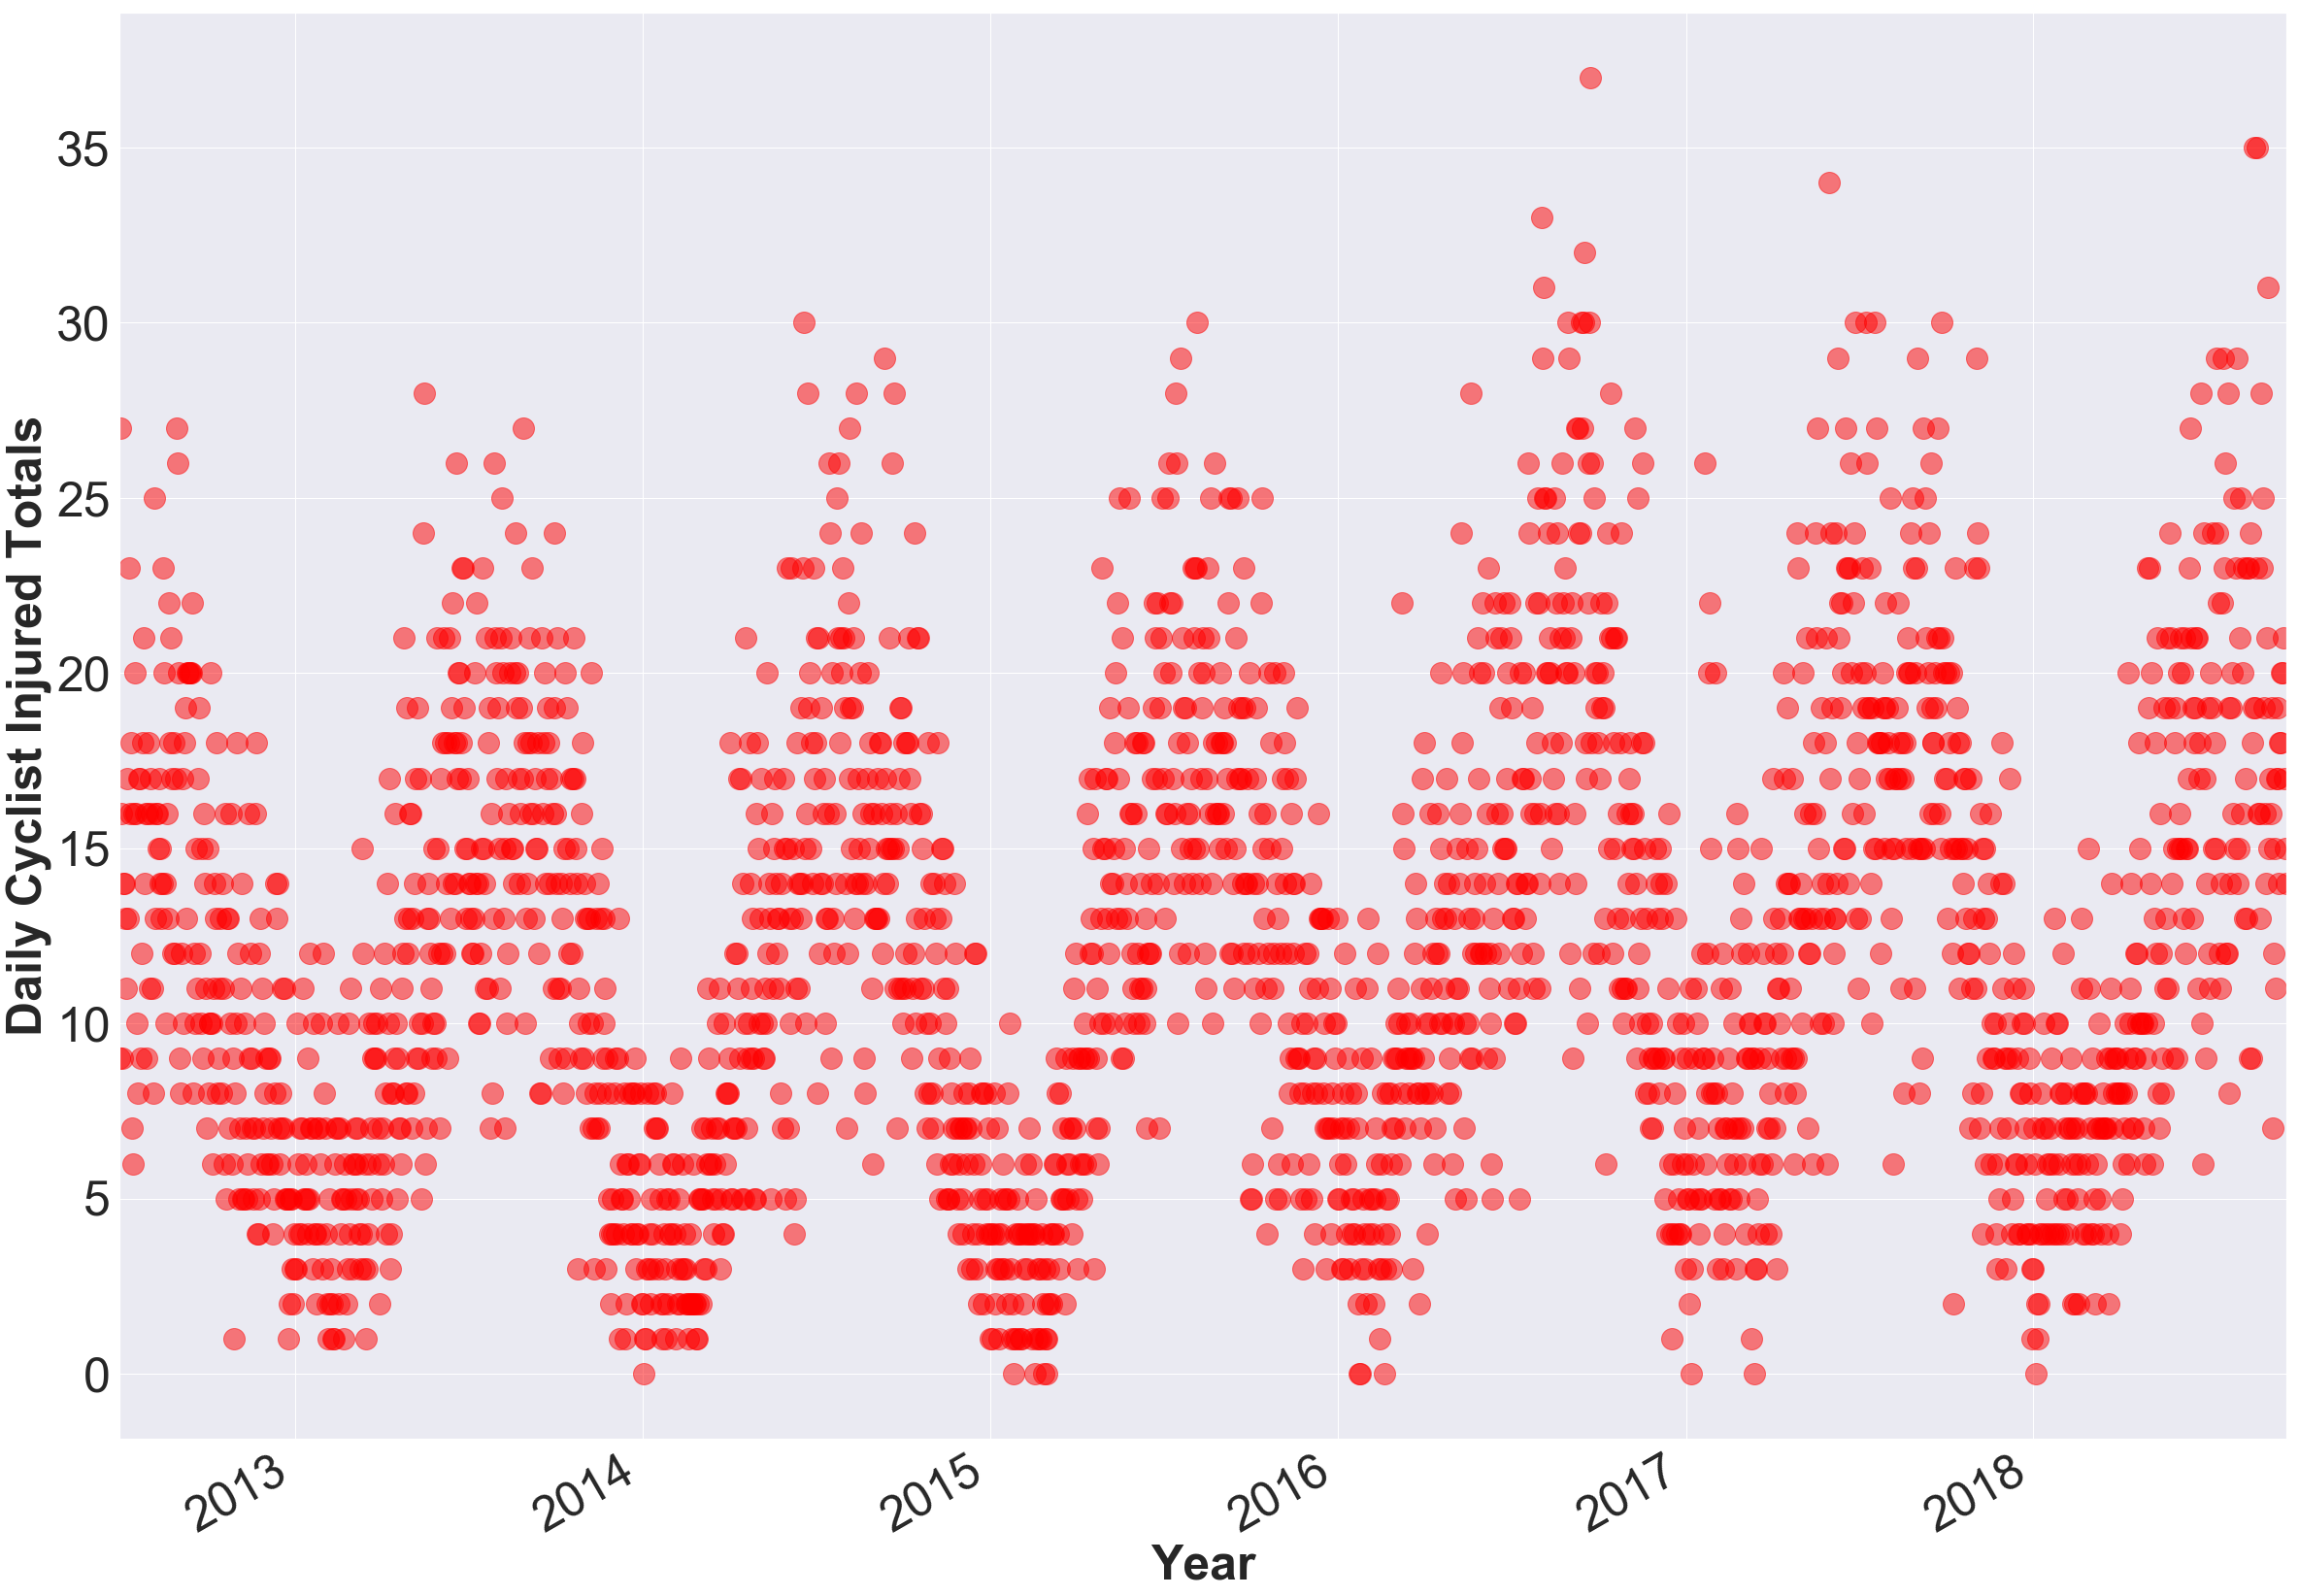

In [45]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofcyclistinjured'].plot(marker='o', color='red', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Cyclist Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')

plt.savefig('../manuscripts/dailycyclistinjuries.png', bbox_inches='tight')

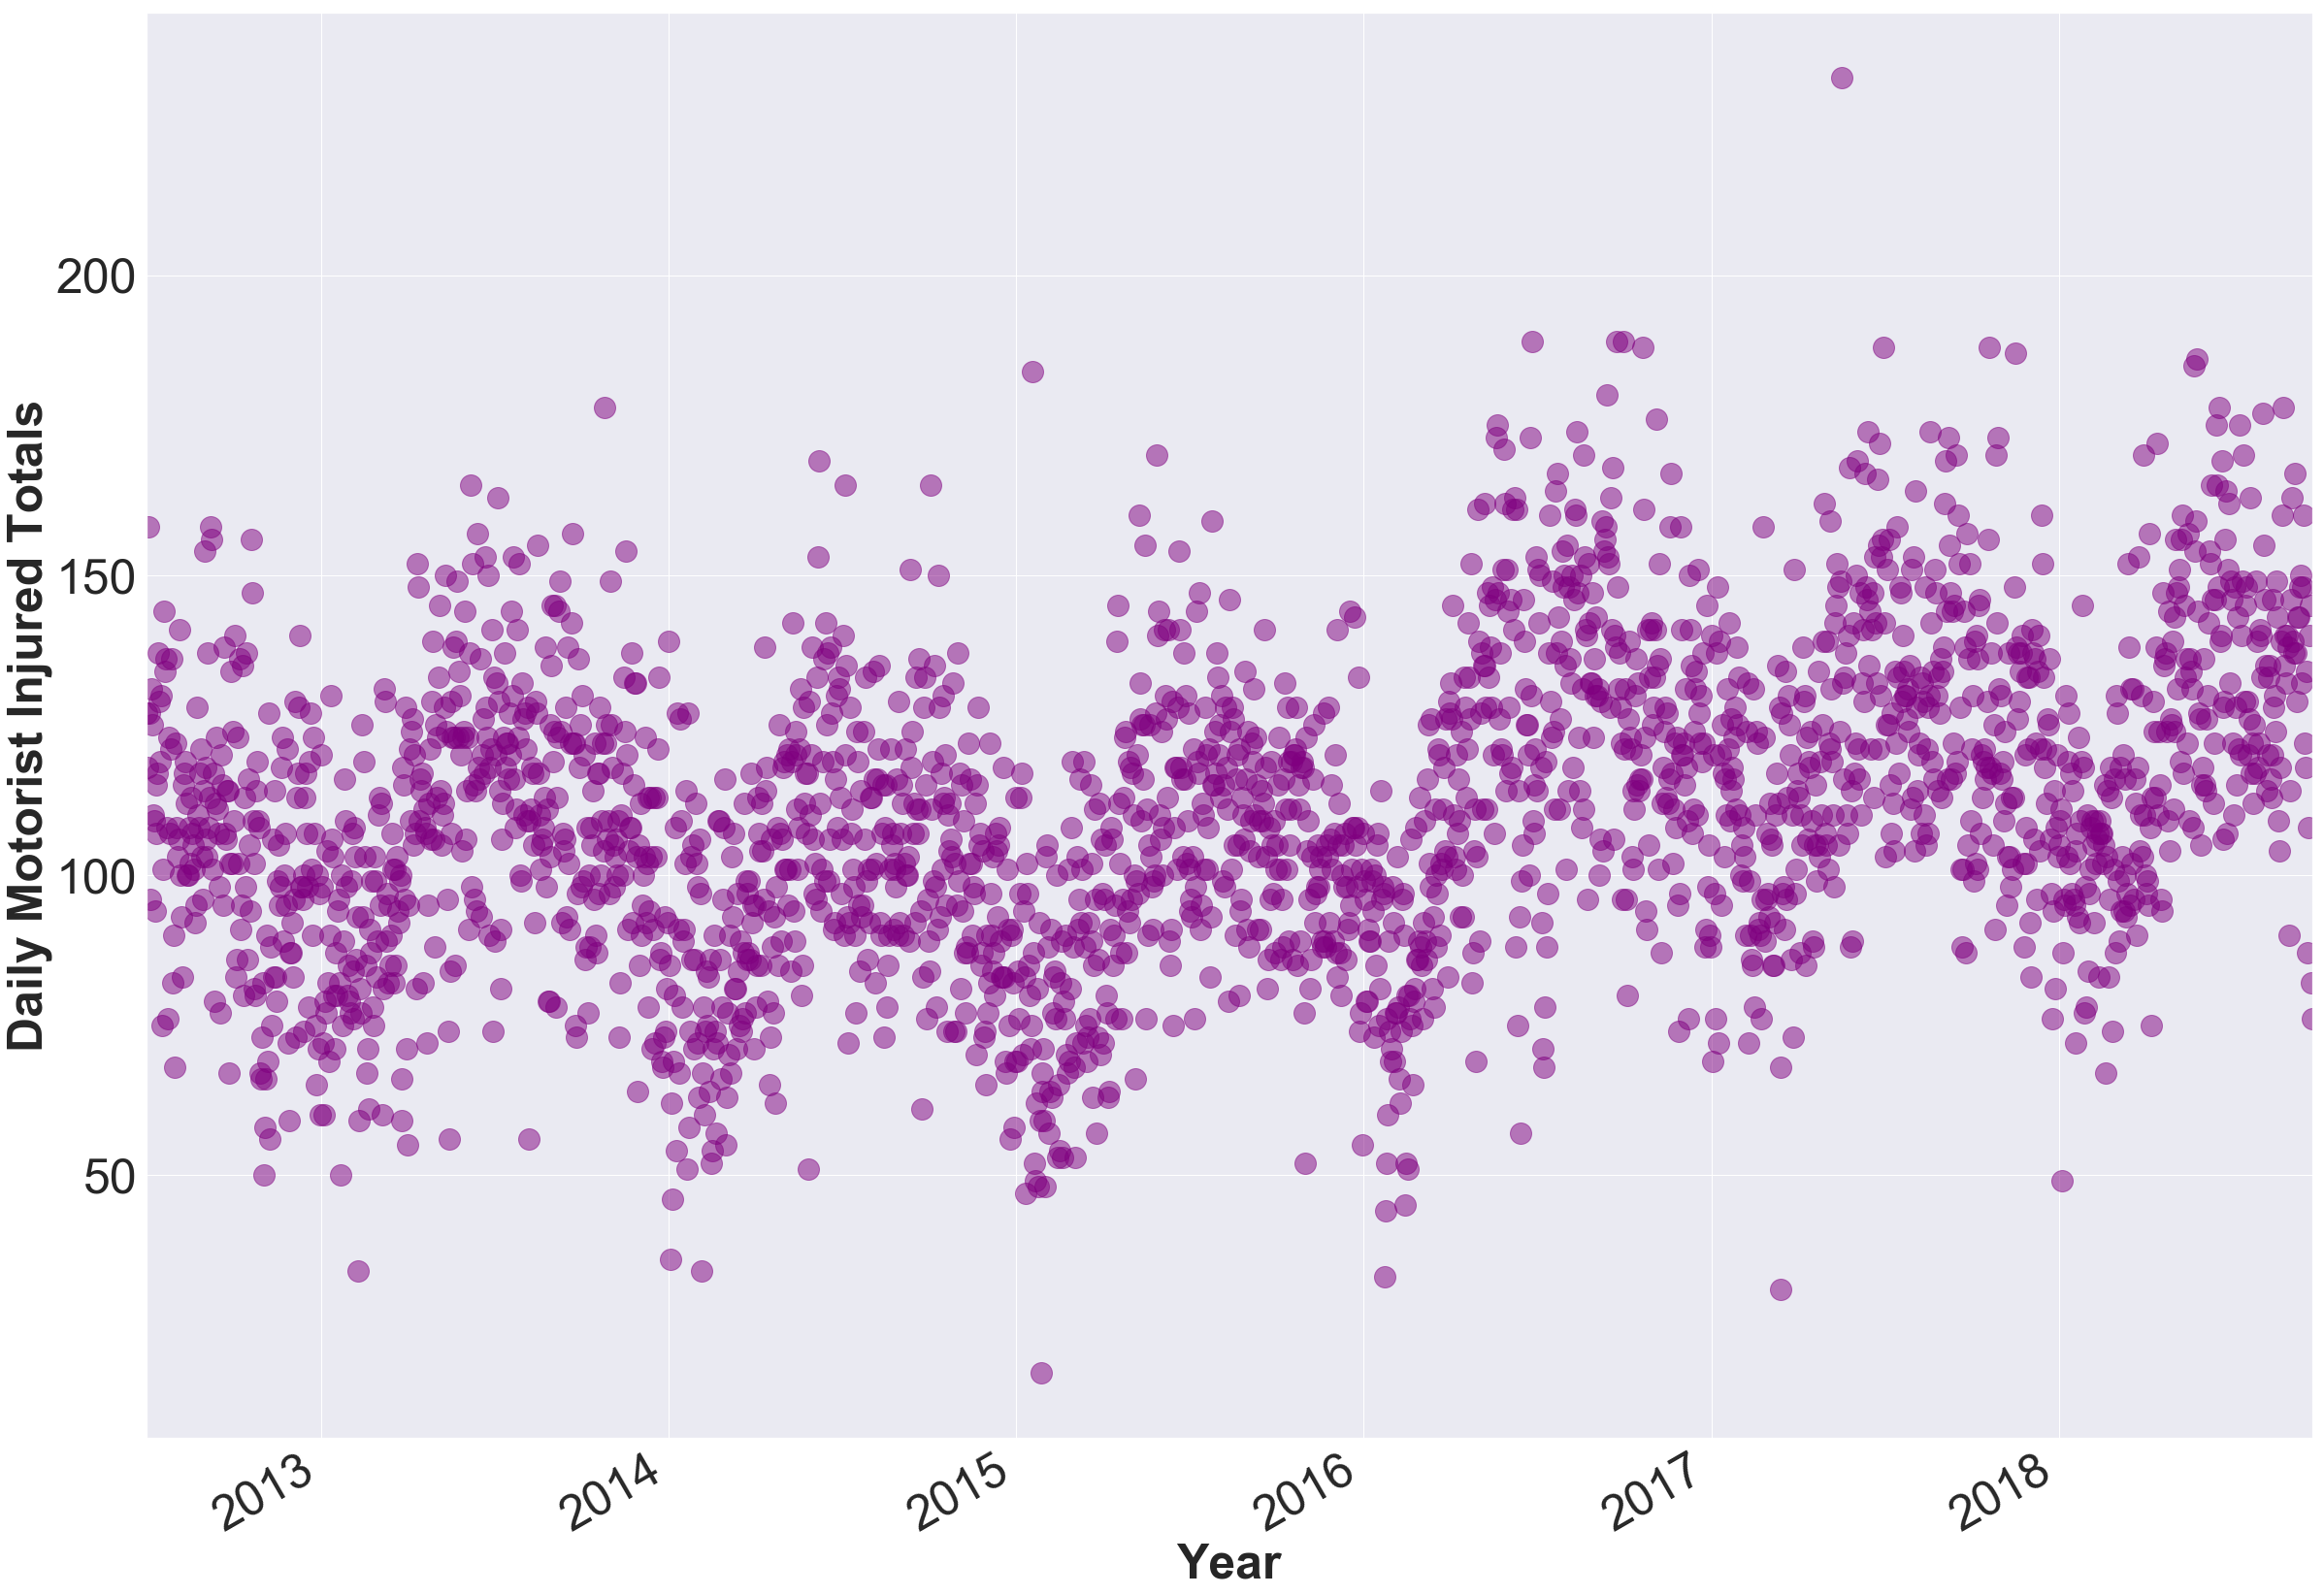

In [49]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofmotoristinjured'].plot(marker='o', color='purple', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Motorist Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')

plt.savefig('../manuscripts/dailymotoristinjuries.png', bbox_inches='tight')

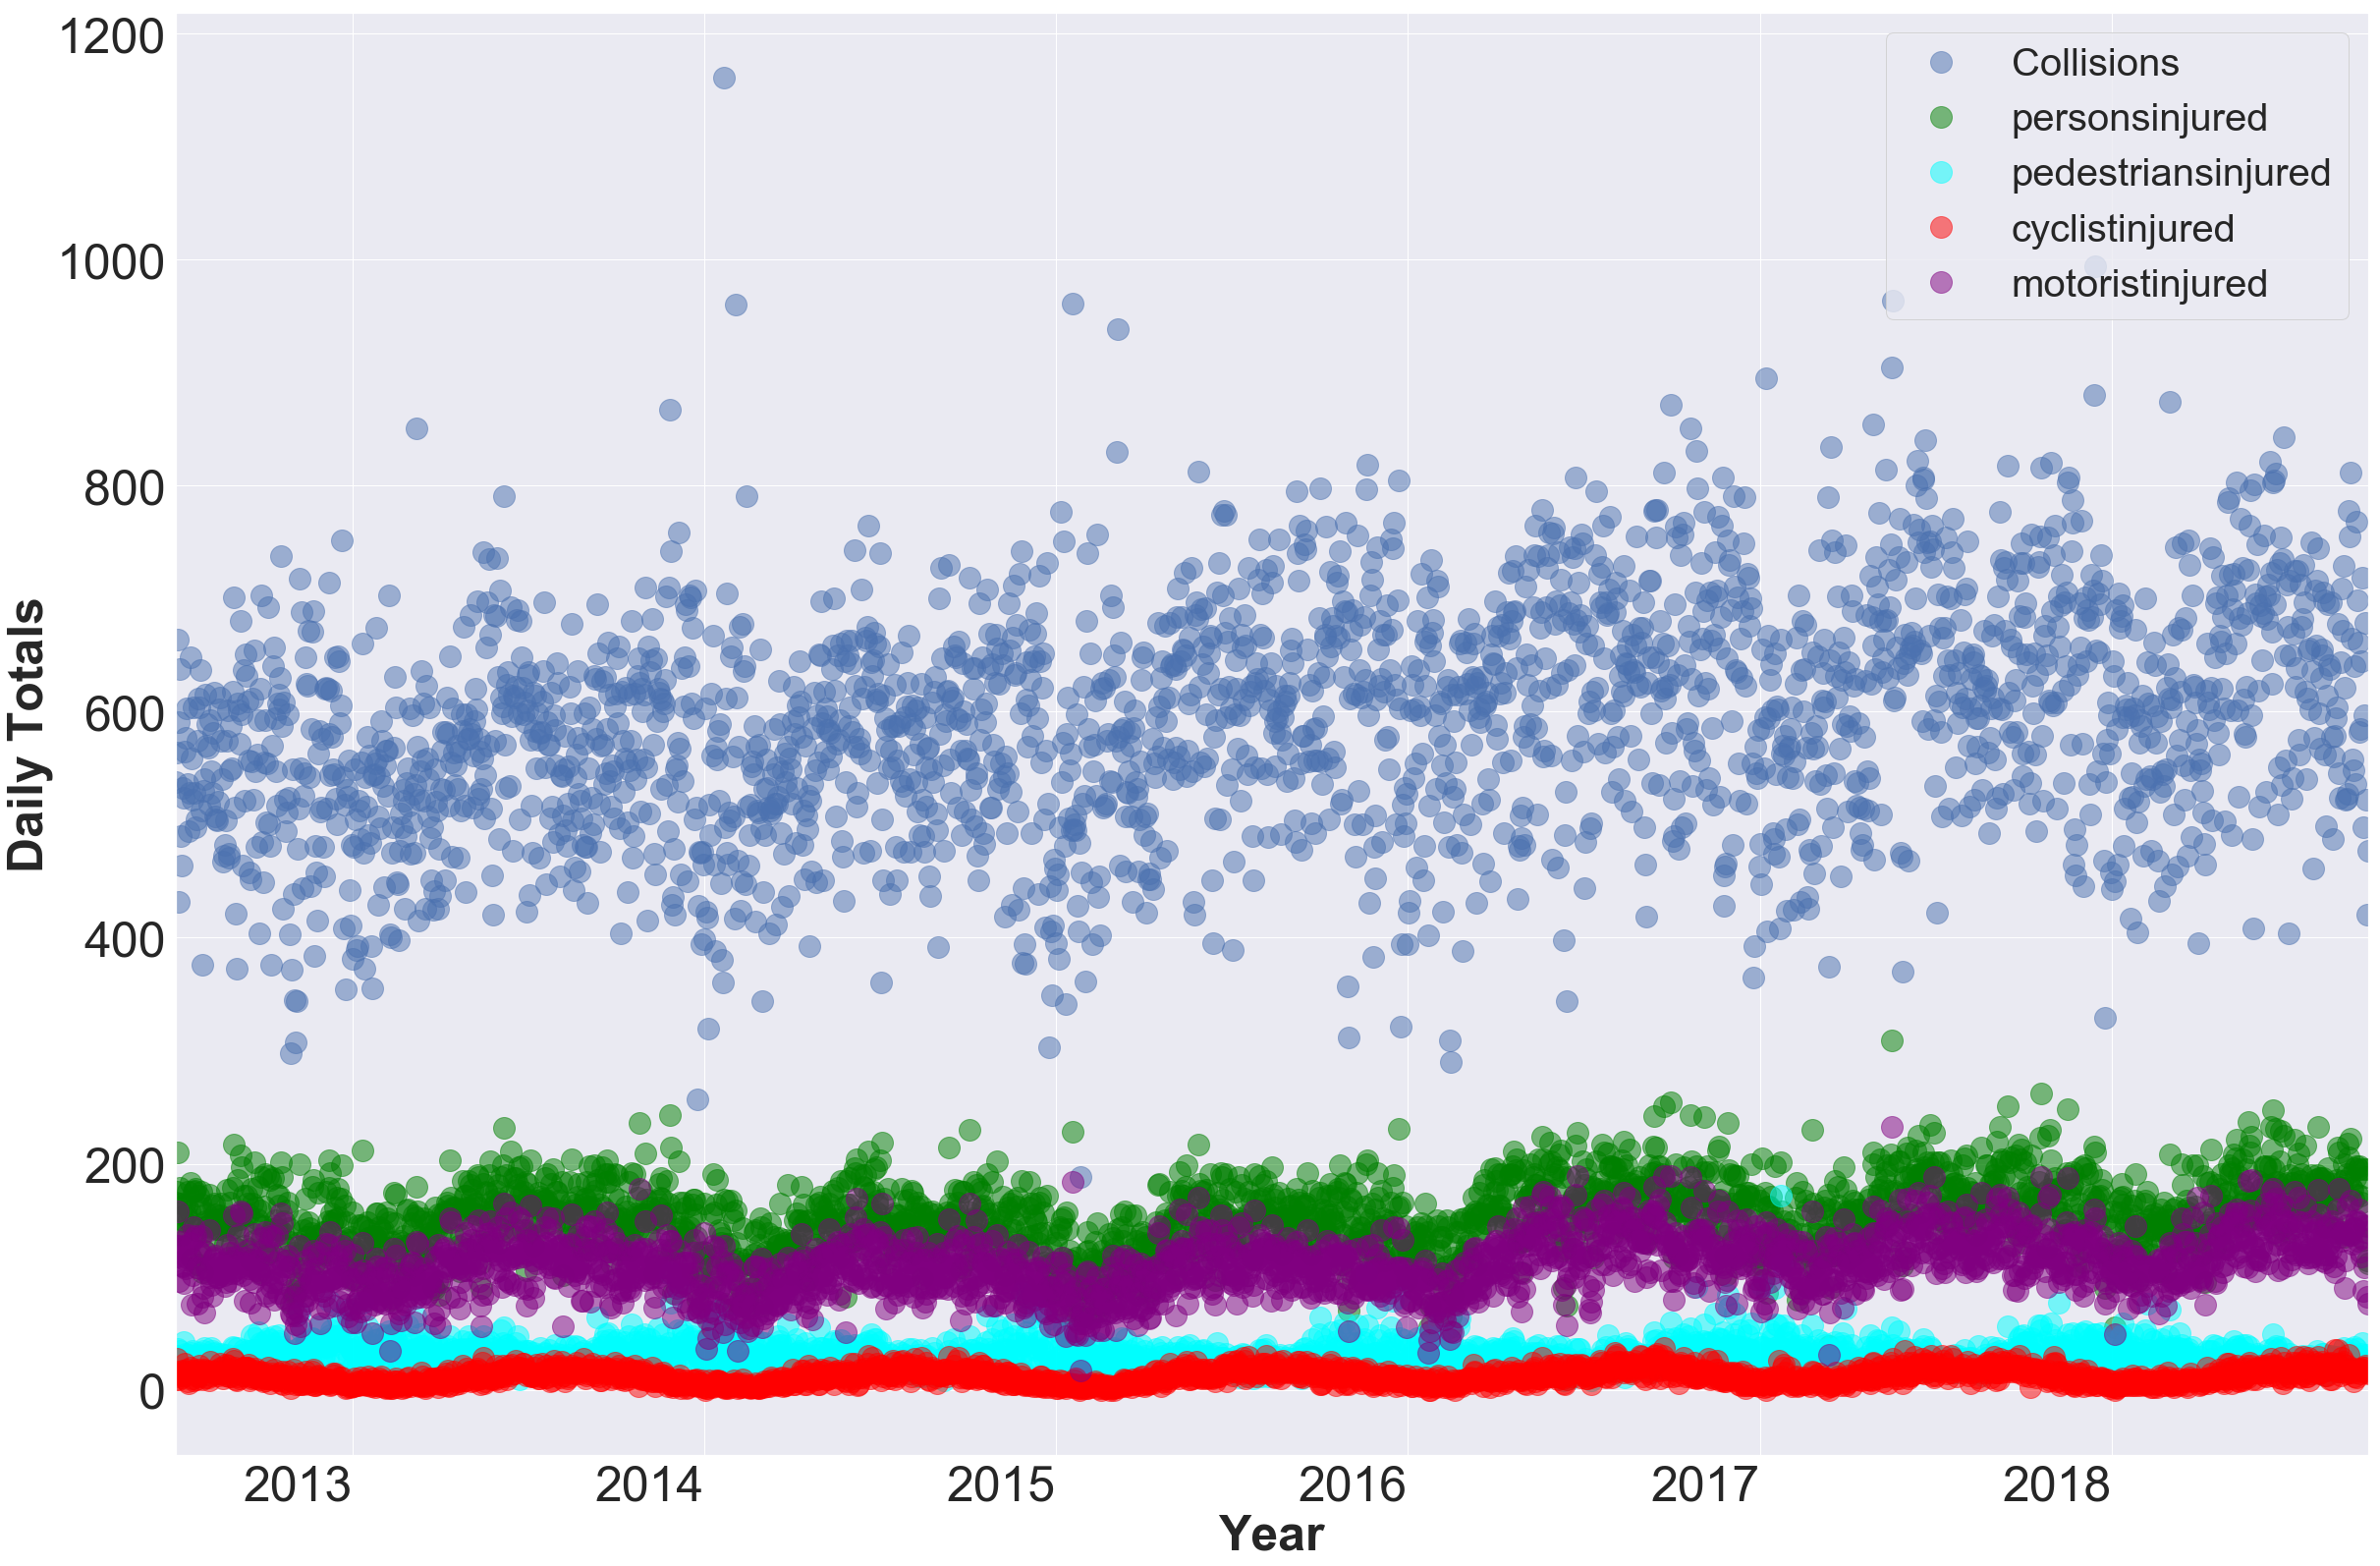

In [43]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['count'].plot(marker='o', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofpersonsinjured'].plot(marker='o', color='green', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofpedestriansinjured'].plot(marker='o', color='cyan', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofcyclistinjured'].plot(marker='o', color='red', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofmotoristinjured'].plot(marker='o', color='purple', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.legend(('Collisions','personsinjured', 'pedestriansinjured', 'cyclistinjured', 'motoristinjured'), loc='upper right',prop={'size':40})
plt.savefig('../manuscripts/dailyall.png', bbox_inches='tight')